### Description

The sample is only 3 song lyrics, which I picked up from 
    
    - Avenir http://www.azlyrics.com/lyrics/louane/avenir.html
    - Andalouse http://www.metrolyrics.com/andalouse-lyrics-kendji-girac.html
    - Le Chant Des Sirenes http://www.metrolyrics.com/le-chant-des-sirenes-lyrics-frero-delavega.html

I am trying to see if its possible to rank songs by how difficult it is to understand the lyrics.

In [186]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [187]:
def get_lyrics_df(target_dir='data'):
    """Read the text files in the target directory and return a dataframe with song name and lyrics mapping."""
    lyrics_mapping = {'song_name': [], 'lyrics': []}
    for filename in os.listdir(target_dir):
        lyrics = open(os.path.join(target_dir, filename),'r').read()
        lyrics_mapping['song_name'].append(filename.split('.')[0])
        lyrics_mapping['lyrics'].append(lyrics)
    return pd.DataFrame(lyrics_mapping).set_index('song_name')

In [188]:
lyrics = get_lyrics_df()
lyrics.head()

,lyrics
song_name,
le_chant_des_sirenes,"Enfants des parcs, gamins des plages\nLe vent ..."
andalouse,"Tu viens le soir, danser sur des airs de guita..."
avenir,"Parti loin derrière, sans trop de raison\nTu m..."


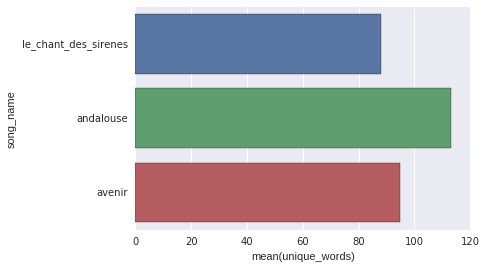

In [189]:
# Check the number of unique words that a person should know or have intuition of
lyrics['unique_words'] = lyrics.lyrics.apply(lambda x: len(set(x.split())))
sns.barplot(x=lyrics.unique_words,  y=lyrics.index)

In [190]:
# Some Cleaning, remove sentences with 2 unique word to remove repetitive words representing sound
def clean_lyrics(lyrics_string):
    """Remove sentences with repetitve words."""
    sentences = lyrics_string.split('\n')
    return '\n'.join([sentence for sentence in sentences if len(set(sentence.split())) > 2])

lyrics['processed_lyrics'] = lyrics.lyrics.apply(clean_lyrics)

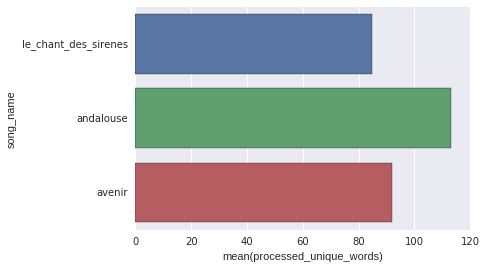

In [191]:
# Change in unique word count by cleaning the lyrics
lyrics['processed_unique_words'] = lyrics.processed_lyrics.apply(lambda x: len(set(x.split())))
sns.barplot(x=lyrics.processed_unique_words,  y=lyrics.index)

The more the number of unique words the more the difficult will be the song, assuming that each word is equally difficult to cramp up in memory (a bad assumption, but works for basic analysis.)

Thus comparatively,

        1. le_chant_des_sirenes - easiest
        2. avenir - moderate
        3. andalouse - hardest

In [198]:
# Repetition of lyrics/words is also in important factor that is easy to capture for this sample set atleast. 
# The idea is that more the repetition less difficult will be the song to understand and easier to get the hang off.
def measure_of_sentence_repetiton(sentences):
    """
    Calculate measure of repetition by computing the number of lines 
    repeating divided by total number sentences
    """
    counter = Counter(sentences)
    repeated_sentences = sum([True for sentence, count in counter.items() if count > 1])
    return repeated_sentences / len(sentences)

In [199]:
lyrics['line_repetition'] = lyrics.processed_lyrics.apply(lambda x: measure_of_sentence_repetiton(x.split('\n')))
lyrics['word_repetition'] = lyrics.processed_lyrics.apply(lambda x: percentage_of_sentence_repetiton(x.split()))

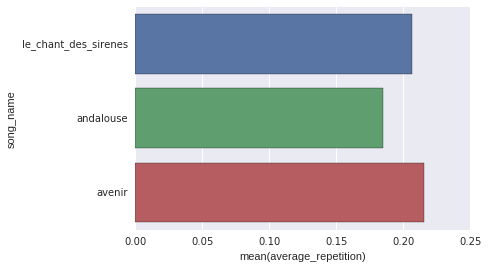

In [200]:
lyrics['average_repetition'] = (lyrics['line_repetition'] + lyrics['word_repetition']) / 2
sns.barplot(x=lyrics.average_repetition,  y=lyrics.index)

Based on measure of repetition the 1st spot has been swapped out by a small margin.

    1. Avenir
    2. Le Chant Des Sirenes
    3. Andalouse
 